<a href="https://colab.research.google.com/github/Richish/hands_on_ml/blob/master/3_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of mnist

In [0]:
import numpy as np

## Loading mnist using sklearn

In [2]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml(name="mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
mnist["DESCR"]

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [5]:
mnist["details"]

{'default_target_attribute': 'class',
 'file_id': '52667',
 'format': 'ARFF',
 'id': '554',
 'licence': 'Public',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495',
 'name': 'mnist_784',
 'processing_date': '2018-10-03 21:23:30',
 'status': 'active',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'upload_date': '2014-09-29T03:28:38',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'version': '1',
 'visibility': 'public'}

In [6]:
X,y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

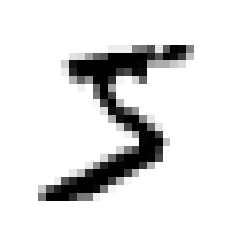

'5'

In [14]:
# shows that each sample is a 28x28 image(black and white), look at one of the samples
import matplotlib.pyplot as plt
import matplotlib as mpl

some_digit=X[0]
some_digit_reshaped=some_digit.reshape(28,28)

plt.imshow(X=some_digit_reshaped, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()
y[0]

In [16]:
# casting y to int from str
y=y.astype(dtype=np.int)
y[0]

5

In [0]:
# splitting to train and test set- 60,000:10,000. The data in sklearn is already shuffled.

X_train, X_test, y_train, y_test = X[:60_000], X[60_000:], y[:60_000], y[60_000:]

## Binary classifier for a single digit - 5

Classifiying if number is 5 or not.

In [23]:
# creating binary labels - 5 or not.

y_train_5 = (y_train == 5)
y_test_5 = (y_test==5)

np.unique(y_train_5)

array([False,  True])

In [27]:
# using sgd(stochastic gradient descent) classifier from sklearn. This classifier is good for large datasets.

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42, early_stopping=False) # fixing random state for reproducibilty
sgd_clf.fit(X=X_train, y=y_train_5)
sgd_clf.predict([some_digit])

array([ True])

## Measuring performance of classifiers

### Accuracy measure via cross validation

In [33]:
# directly using sklearn's functionality
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [32]:
# custom cv

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf) # creates a clone of the classifier
    X_train_folds=X_train[train_index]
    y_train_folds=y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred==y_test_folds)
    correct_percent=n_correct/len(y_pred)
    print(correct_percent)





/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.95035
0.96035
0.9604


In [0]:
# dumb classifier that just classifies every single image in the “not-5” class

In [0]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros(shape=(len(X), 1), dtype=bool)


In [47]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])